<a href="https://colab.research.google.com/github/Rajeshaligeti/Rajesh-Aligeti/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING  LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve, average_precision_score

**Loading and Exploring the Dataset**

In [4]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/CVD_cleaned(in).csv')

# Display the first few rows of the dataset
df.head()

# Summary statistics
df.describe()

# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

**Data Preprocessing**

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/CVD_cleaned(in).csv')

# List of categorical columns to encode
categorical_cols = [
    'General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
    'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
    'Age_Category', 'Smoking_History'
]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Ensure that the target variable (e.g., 'Heart_Disease') is encoded as well
df['Heart_Disease'] = df['Heart_Disease'].astype(int)

In [6]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Exploratory Data Analysis (EDA)**

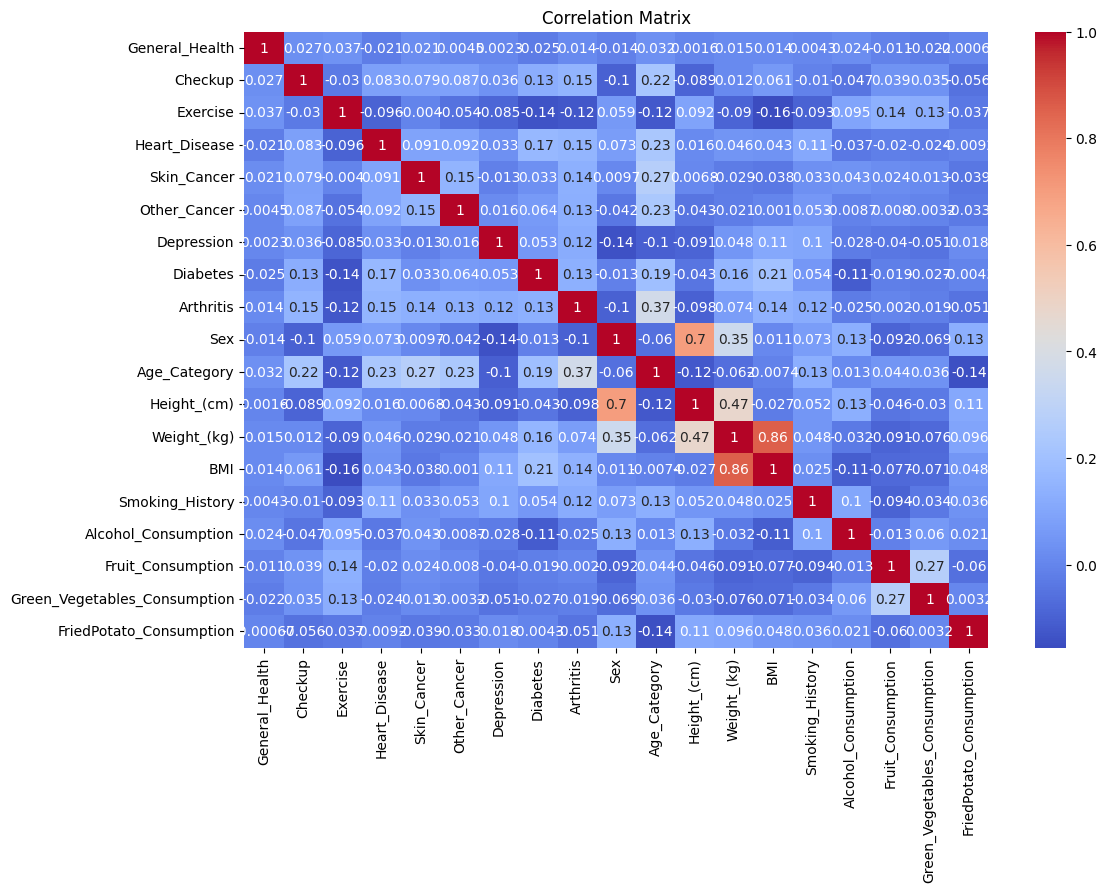

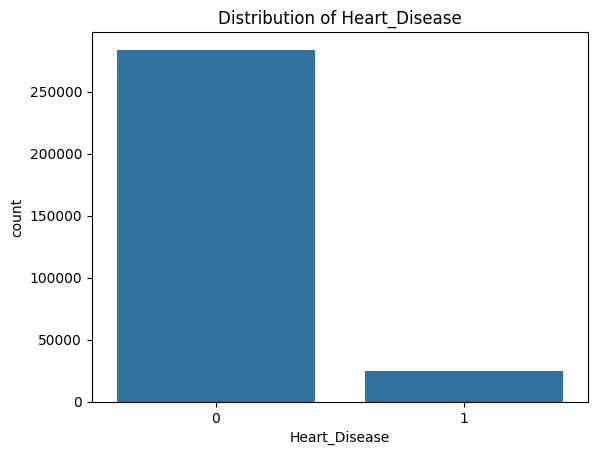

In [7]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Target variable distribution
sns.countplot(x='Heart_Disease', data=df)
plt.title('Distribution of Heart_Disease')
plt.show()



*   **Logistic Regression**





In [8]:
# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting the test set results
y_pred_logreg = logreg.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Precision:",precision_score(y_test, y_pred_logreg))
print("Logistic Regression Recall:",recall_score(y_test, y_pred_logreg))
print("Logistic Regression F1-Score:",f1_score(y_test, y_pred_logreg))
print("Logistic Regression ROC-AUC:",roc_auc_score(y_test, y_pred_logreg))

[[56639   135]
 [ 4867   130]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.49      0.03      0.05      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.51      0.50     61771
weighted avg       0.89      0.92      0.88     61771

Logistic Regression Accuracy: 0.9190234899872108
Logistic Regression Precision: 0.49056603773584906
Logistic Regression Recall: 0.02601560936561937
Logistic Regression F1-Score: 0.04941087039148612
Logistic Regression ROC-AUC: 0.5118188801751126


**Balancing Data using SMOTE**

In [9]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
# Logistic Regression model with Grid Search CV
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=10000), param_grid=param_grid_lr, cv=5, scoring='f1', verbose=2)
grid_search_lr.fit(X_train_resampled, y_train_resampled)

best_lr_model = grid_search_lr.best_estimator_

# Predicting the test set results with the best Logistic Regression model
y_pred_best_lr = best_lr_model.predict(X_test)

# Evaluate the best Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_best_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_best_lr)
class_report_lr = classification_report(y_test, y_pred_best_lr)
roc_auc_lr = auc(*roc_curve(y_test, best_lr_model.predict_proba(X_test)[:, 1])[:2])
precision_lr, recall_lr, f1_score_lr = class_report_lr.split()[-3:]

print('Logistic Regression Accuracy:', accuracy_lr)
print('Confusion Matrix:\n', conf_matrix_lr)
print('Classification Report:\n', class_report_lr)
print('Logistic Regression ROC-AUC:', roc_auc_lr)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END ..................C=0.001, penalty=l2, solver=lbfgs; total time=   1.7s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   1.5s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   1.4s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   1.3s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END ...................C=0.01, penalty=l2, 

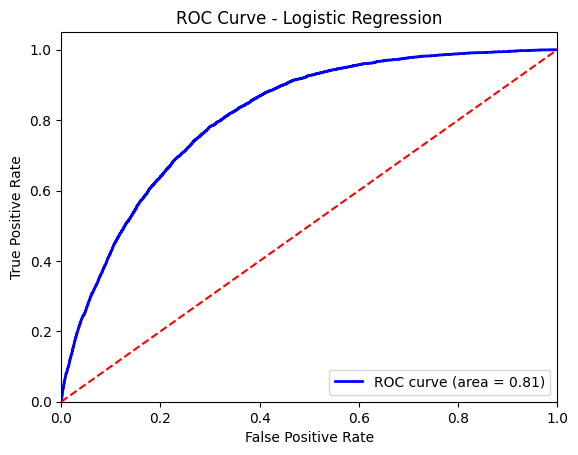

In [11]:
# Plot ROC Curve and AUC for Logistic Regression
y_prob_lr = best_lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

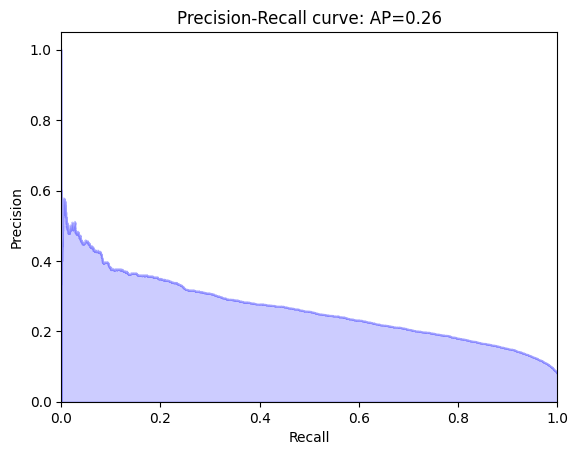

In [12]:
# Plot Precision-Recall Curve for Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
average_precision_lr = average_precision_score(y_test, y_prob_lr)

plt.figure()
plt.step(recall_lr, precision_lr, color='b', alpha=0.2, where='post')
plt.fill_between(recall_lr, precision_lr, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision_lr))
plt.show()

**Parameter Tuning Using GridSearchCV**

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Define the pipeline including feature scaling, oversampling, and model
pipeline = make_pipeline(
    StandardScaler(),
    SMOTE(random_state=42),
    LogisticRegression(random_state=42)
)

# Define parameter grid for GridSearchCV
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'logisticregression__penalty': ['l1', 'l2'],          # Regularization penalty
    'logisticregression__solver': ['liblinear', 'saga']    # Optimization algorithm
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Best Model Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   2.2s
[CV] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   2.3s
[CV] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   3.4s
[CV] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   2.5s
[CV] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   2.2s
[CV] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=saga; total time=   4.2s
[CV] END logisticregression__C=0.001, logisticregression__penalty=l1, logisticregression__solver=saga; total time=   5.6s
[CV] END logisticregression__C=0.001, logisticregression__p

In [14]:
from sklearn.metrics import roc_auc_score

# Assuming best_model is your tuned logistic regression model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print('ROC-AUC Score:', roc_auc)


ROC-AUC Score: 0.8114784219106517


**Future Importance**

In [17]:
# Assuming best_model is your tuned logistic regression model
lr_model = best_model.named_steps['logisticregression']  # Extract the LogisticRegression model from the pipeline
feature_importance = lr_model.coef_[0] # Now you can access coef_ from the lr_model
feature_names = X.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print('Feature Importance:')
print(feature_importance_df)

Feature Importance:
                         Feature  Importance
9                   Age_Category    1.177333
8                            Sex    0.502568
13               Smoking_History    0.280802
6                       Diabetes    0.256512
1                        Checkup    0.243084
5                     Depression    0.224934
7                      Arthritis    0.205576
12                           BMI    0.086956
4                   Other_Cancer    0.060049
3                    Skin_Cancer    0.008138
11                   Weight_(kg)   -0.011803
17       FriedPotato_Consumption   -0.025844
16  Green_Vegetables_Consumption   -0.047308
15             Fruit_Consumption   -0.052164
10                   Height_(cm)   -0.083925
0                 General_Health   -0.105326
2                       Exercise   -0.114073
14           Alcohol_Consumption   -0.159952


**Hyperparameter Tuning**

In [18]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=2)
grid_search_lr.fit(X_train, y_train)

# Evaluate best model
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print('Best Logistic Regression Model Accuracy:', accuracy_lr)
print(classification_report(y_test, y_pred_lr))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.3s
[CV] END ................................C=0.001, penalty=l2; total time=   0.4s
[CV] END ................................C=0.001, penalty=l2; total time=   0.3s
[CV] END ................................C=0.001, penalty=l2; total time=   0.4s
[CV] END ................................C=0.001, penalty=l2; total time=   0.3s
[CV] END .................................C=0.01, penalty=l1; total time=   0.0s
[CV] END .................................C=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Logistic Regression Model Accuracy: 0.9190396788136828
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.49      0.02      0.03      4997

    accuracy                           0.92     61771
   macro avg       0.70      0.51      0.50     61771
weighted avg       0.89      0.92      0.88     61771



**Confusion Matrix**

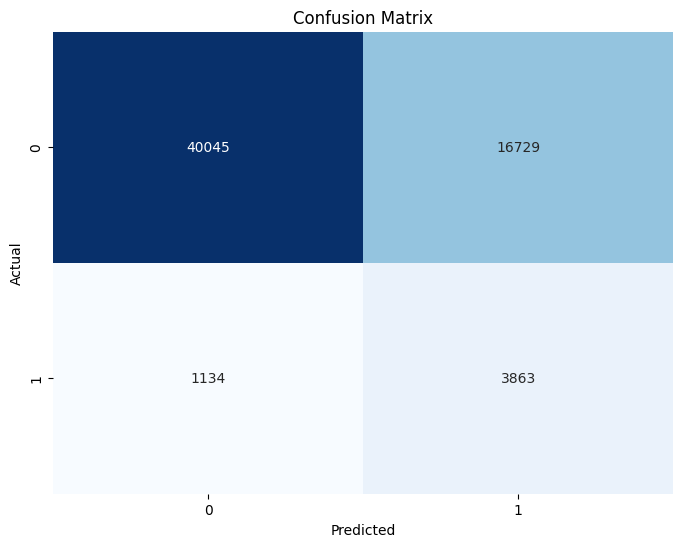

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Precision Recall Curve**

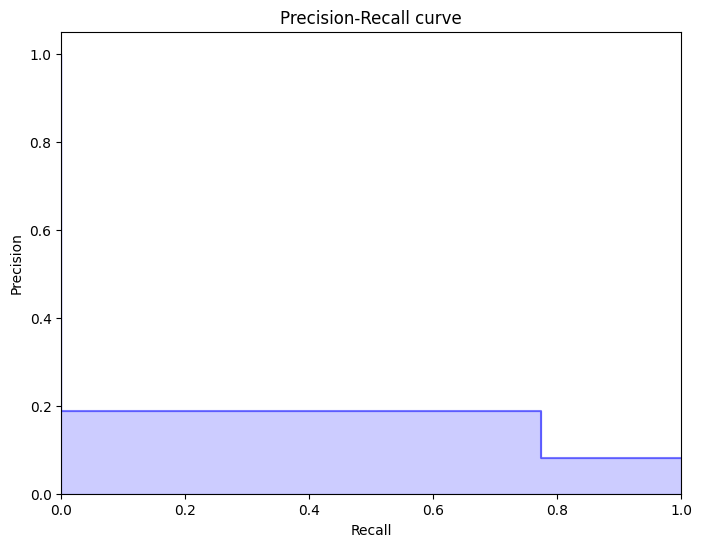

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Compute precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_best_lr)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()


**ROC Curve**


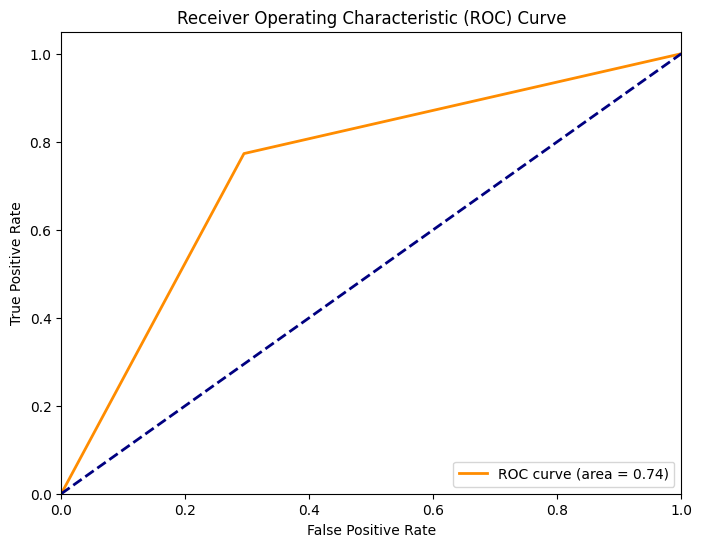

In [30]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_best_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Model Performance Metrics**

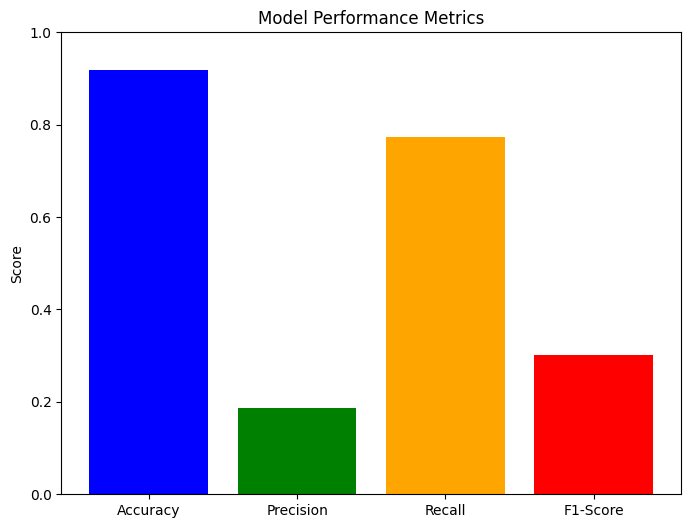

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics = {
    'Accuracy': accuracy_lr,
    'Precision': precision_score(y_test, y_pred_best_lr),
    'Recall': recall_score(y_test, y_pred_best_lr),
    'F1-Score': f1_score(y_test, y_pred_best_lr)
}

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()


**Deployment**

In [39]:
import joblib

# Assuming best_lr_model is your trained logistic regression model
joblib.dump(best_lr_model, 'logistic_regression_model.pkl')
# Load the model
loaded_model = joblib.load('logistic_regression_model.pkl')

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.savefig('precision_recall_curve.png')
plt.close()

In [41]:
import pandas as pd

metrics = {
    'Accuracy': accuracy,
    'Precision': precision_score(y_test, y_pred_best_lr),
    'Recall': recall_score(y_test, y_pred_best_lr),
    'F1-Score': f1_score(y_test, y_pred_best_lr)
}

metrics_df = pd.DataFrame(metrics, index=['Logistic Regression'])
metrics_df.to_csv('model_metrics.csv')